# 1. Introdução do Projeto e Definição do Escopo

A **Netflix**, atualmente, é uma das maiores plataformas de serviço de streaming do mundo. Lançada inicialmente em 2007, a plataforma oferece milhares de títulos entre filmes, séries e documentários que podem ser consumidos por qualquer indivíduo através do pagamento de uma assinatura mensal ou anual. Com o crescimento exponencial de seu catálogo, torna-se cada vez mais importante **entender padrões de produção e consumo de conteúdo**, bem como **desenvolver sistemas que auxiliem na recomendação personalizada de títulos aos usuários**.

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Netflix_2015_logo.svg/330px-Netflix_2015_logo.svg.png)

Este projeto acadêmico tem como principal objetivo analisar e modelar um dataset público contendo informações gerais sobre séries/filmes disponíveis na Netflix e, através da utilização de técnicas de ciência de dados e inteligência artificial, **compreender padrões** e **desenvolver um sistema básico de recomendação de títulos baseado em similaridade de conteúdo**. Ademais, os **objetivos específicos** que buscarão ser atingidos durante a realização deste projeto são:

- Realização da limpeza e tratamento dos dados;
- Exploração estatística do dataset;
- Identificação de tendências por gênero, país e ano de lançamento;
- Representação de informações textuais (como gêneros e elenco) em vetores numéricos;
- Desenvolvimento de um sistema básico de recomendação de conteúdo com IA;
- Avaliação e visualização dos resultados obtidos

# 2. Limpeza e Tratamento dos Dados

## 2.1 Introdução dos Dados

Antes de começarmos, de fato, o projeto, é importante importarmos as principais bibliotecas que serão utilizadas ao decorrer do mesmo. Em seguida, carregaremos o dataset que será base para todas nossas ações futuras.

In [1]:
# Importação das bibliotecas:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o dataset:

df = pd.read_csv("netflix_titles.csv")

À partir deste momento, conheceremos alguns aspectos chaves que compõem nosso dataset, como: informações sobre suas **colunas** e **linhas** e **parte** de seus **dados**.

In [3]:
# Exibindo os cinco (5) primeiros conjuntos de linhas e colunas:

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Exibindo os cinco (5) últimos conjuntos de linhas e colunas:

df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
# Total de linhas e colunas do dataset:

df.shape

(8807, 12)

In [6]:
# Informações gerais sobre o dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### 2.1.1 Modificando Colunas

Nesta sessão, estaremos realizando duas simples mudanças relacionadas às colunas que estão disponíveis em nosso dataset. A **primeira** consiste em transformar a coluna **_'show_id'_** no índice do DataFrame para facilitar a manipulação dos dados. Já na **segunda**, iremos converter os tipos das colunas para seus tipos corretos.

In [7]:
# Transformando a coluna 'show_id' no índice do dataset:

df.set_index('show_id', inplace = True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Convertendo o tipo de colunas específicas para o tipo correto:

df['type'] = df['type'].astype('category')
df['date_added'] = pd.to_datetime(df['date_added'], format = 'mixed')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   category      
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       7976 non-null   object        
 5   date_added    8797 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8803 non-null   object        
 8   duration      8804 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 765.6+ KB


## 2.2 Tratamento dos Dados

Antes de tudo, precisamos verificar se nosso dataset possui dados ausentes.

In [9]:
# Verificando a presença de dados ausentes (NaN) nas colunas:

df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Como mostrado acima, nosso dataset **possui** dados ausentes e em **alta** quantidade. Considerando o projeto que será realizado, a melhor abordagem que podemos utilizar é a de preencher os valores das colunas mais afetadas por estas lacunas com "Unknown", visto que, caso simplesmente decidíssimos excluir-los, perderíamos um grande volume de dados, o que não é bom quando estamos pensando em construir um sistema de recomendação de conteúdo.

In [10]:
# Preenchendo as colunas mais afetadas com "Unknown":

df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")

df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Em seguida, é importante preenchermos as colunas que foram menos afetadas com seus respectivos tipos de dados:

In [11]:
# Preenchendo as colunas menos afetadas com seus respectivos tipos de dados:

df.loc[df['rating'].str.contains('min', na = False), 'rating'] = "TV-MA"
df['rating'] = df['rating'].fillna("TV-MA")
df['duration'] = df['duration'].fillna("60 min")
df['date_added'] = df['date_added'].fillna("1900-01-01")

Por fim, verificamos se restou algum dado ausente:

In [23]:
# Verificando se restaram dados ausentes:

df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Antes de prosseguirmos para a próxima etapa, é essencial checarmos, também, se temos **valores duplicados** que possam nos comprometer:

In [24]:
# Verificando se temos dados duplicados:

df.duplicated().value_counts()

False    8807
Name: count, dtype: int64

Como não há registros de dados duplicados, podemos prosseguir para a próxima etapa.

# 3. Análise Exploratória dos Dados (EDA)

Após realizarmos a etapa de pré-processamento e tratamento dos dados, é de suma importância **explorá-los** de forma aprofundada para descobrirmos quais, de fato, são os tipos de dados com os quais estamos lidando e o quê eles representam estatisticamente. Este processo é chamado de **Análise Exploratória de Dados**, onde por meio de métodos estatísticos e visuais (como gráficos), podemos ter insights reveladores sobre os dados que compõem nosso dataset.

Para começarmos, vamos utilizar o método **.describe()** para ter uma visão geral sobre as estatísticas descritivas do nosso dataset.

In [14]:
# Explorando estatísticas descritivas do dataset:

df.describe()

,date_added,release_year
count,8807,8807.000000
mean,2019-03-28 17:49:59.114340864,2014.180198
min,1900-01-01 00:00:00,1925.000000
25%,2018-04-03 00:00:00,2013.000000
50%,2019-07-01 00:00:00,2017.000000
75%,2020-08-18 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


Por este método, conseguimos ter visões básicas sobre métodos estatísticos acerca de nossos dados, como **count** (número de valores), **mean** (média) e **std** (desvio padrão de valores). Apesar de útil, ele cobriu apenas duas colunas do dataset. Portanto, trataremos de explorar as outras colunas a seguir.

## 3.1 Estatísticas Descritivas das Colunas

Acima, as estatísticas que foram exibidas pelo método **.describe()** cobriram apenas colunas que possuíam valores predominantemente numéricos. Agora, utilizaremos o mesmo método .describe() para colunas categóricas, ou seja, que possuem conteúdos textuais.

### 3.1.1 Colunas 'type' e 'title'

Ordenaremos a exibição por pares de colunas. Começaremos pelas colunas **_'type'_** e **_'title'_**.

In [15]:
# Explorando estatisticamente as colunas 'type' e 'title':

df[['type', 'title']].describe()

,type,title
count,8807,8807
unique,2,8807
top,Movie,Dick Johnson Is Dead
freq,6131,1


Como é possível observar, o método **.describe()**, quando utilizado em colunas não-numéricas, traz métodos estatísticos diferentes. No caso, temos **count** (quantidade de valores não nulos), **unique** (número de valores distintos), **top** (valor mais frequente) e **freq** (frequência do valor mais frequente).

Concluimos que filmes são os tipos de mídia mais comuns no catálogo da Netflix e, também, que não há repetições de títulos.

### 3.1.2 Colunas 'director' e 'cast'

Em seguida, partiremos para as colunas **_'director'_** e **_'cast'_**.

In [43]:
# Explorando estatisticamente a coluna 'director':

df['director'][df['director'] != "Unknown"].str.split(",").explode().str.lstrip().describe()

count              6978
unique             4993
top       Rajiv Chilaka
freq                 22
Name: director, dtype: object

In [44]:
# Explorando estatisticamente a coluna 'cast':

df['cast'][df['cast'] != 'Unknown'].str.split(",").explode().str.lstrip().describe()

count           64126
unique          36439
top       Anupam Kher
freq               43
Name: cast, dtype: object

Como foi possível observar, a execução destes dois pares foi realizada de uma forma diferente se comparada às colunas do tópico anterior. Isto se dá porque, neste caso, estamos lidando com colunas que possuem uma alta quantidade de dados ausentes que foram tratados, portanto excluímos o valor "Unknown" da saída do método .describe(). Além disso, foram utilizados métodos como **.str.split()** e **explode()** para reunirmos estes dados com precisão, visto que muitos deles estão agrupados nas colunas por vírgulas.

Ademais, é possível concluir que **Rajiv Chilaka** é o diretor com mais títulos na Netflix, enquanto **Anupam Kher** é o ator que mais vezes apareceu em filmes/séries do streaming.

### 3.1.3 Colunas 'country' e 'rating'

Continuaremos com as colunas **_'country'_** e **_'rating'_**.

In [61]:
# Explorando estatisticamente a coluna 'country':

df['country'][df['country'] != "Unknown"].str.split(",").explode().str.lstrip().describe()

count             10019
unique              123
top       United States
freq               3690
Name: country, dtype: object

In [63]:
# Explorando estatisticamente a coluna 'rating':

df['rating'][df['rating'] != "Unknown"].describe()

count      8807
unique       14
top       TV-MA
freq       3214
Name: rating, dtype: object

Com isso, conseguimos concluir que os **Estados Unidos** possuem o maior número de títulos na Netflix, enquanto **TV-MA**, ou Mature Audience Only (Apenas para Público Adulto), é a classificação indicativa mais presente em todo o catálogo do streaming.

### 3.1.4 Colunas 'duration', 'listed_in' e 'description'

Começaremos pela coluna **_'duration'_**.

In [20]:
# Explorando estatisticamente a coluna 'duration':

df['duration'][df['duration'] != "Unknown"].describe()

count         8807
unique         220
top       1 Season
freq          1793
Name: duration, dtype: object

In [21]:
# Explorando estatisticamente a coluna 'listed_in':

df['listed_in'].str.split(",").explode().str.lstrip().describe()

count                    19323
unique                      42
top       International Movies
freq                      2752
Name: listed_in, dtype: object

In [22]:
# Explorando estatisticamente a coluna 'description'

print("Comprimento das Descrições: ")
print(" ")
print(df['description'].str.len().describe())
print(" ")
print("Quantidade de Palavras das Descrições:")
print(" ")
print(df['description'].str.split().str.len().describe())

Comprimento das Descrições: 
 
count    8807.000000
mean      143.303281
std        10.334959
min        61.000000
25%       140.000000
50%       146.000000
75%       149.000000
max       248.000000
Name: description, dtype: float64
 
Quantidade de Palavras das Descrições:
 
count    8807.000000
mean       23.882253
std         2.836704
min        10.000000
25%        22.000000
50%        24.000000
75%        26.000000
max        48.000000
Name: description, dtype: float64


Em relação à coluna **_duration_**, podemos concluir que a maioria dos títulos da Netflix possuem apenas **1 temporada**. Na coluna **_listed_in_**, utilizamos os métodos _split_, _lstrip_ e _explode_ para obtermos nossos resultados finais. Recorremos a estes métodos por conta da formatação da coluna que, inicialmente, veio no dataset. Analisando-a, temos a noção de que **filmes internacionais** é o gênero mais presente no catálogo.

Por fim, como a coluna **_description_** é composta, principalmente, por frases, decidimos utilizar dois métodos estatísticos peculiares especificamente para ela: o comprimento das descrições e a quantidade de palavras das descrições, ambos realizados através da função **.len()**.

Com todas as colunas destrinchadas, podemos partir para a etapa seguinte: a visualização de estatísticas em formato visual, ou seja, em **gráficos**.

## 3.2 Gráficos das Colunas

Após termos visualizado as estatísticas obtidas na sessão anterior, é de suma importância transformá-las em representações visuais para termos um entendimento mais profundo de como os nossos dados estão distribuídos em cada coluna. Nesta etapa, utilizaremos diversos tipos de gráficos proporcionados pelas bibliotecas **_seaborn_** e **_matplotlib_**, como **histogramas** e **countplots**.

Um adendo: apesar de possuírem dados importantes para nossa análise, as colunas **_'title'_**, **_'data_added'_** e **_'description'_** não estarão incluídas nesta sessão, pois seus valores não dão margem para interpretação.

Começaremos pela coluna **_type_**.

### 3.2.1 Coluna 'type'

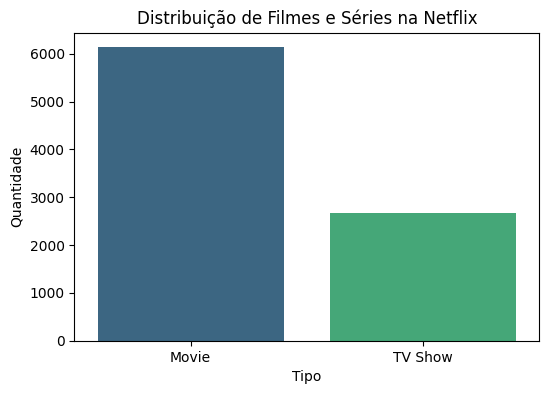

In [29]:
# Criando o gráfico da coluna 'type':

plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = "type", hue = "type", palette = "viridis")
plt.title("Distribuição de Filmes e Séries na Netflix")
plt.xlabel("Tipo")
plt.ylabel("Quantidade")
plt.show()

Como vimos anteriormente, definitivamente existem mais filmes que séries no catálogo da Netflix.

### 3.2.2 Coluna 'director'

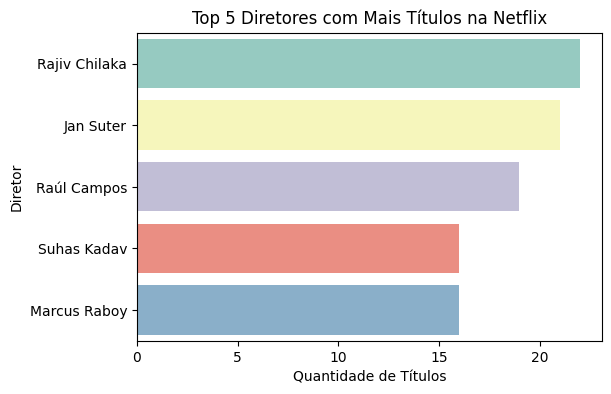

In [56]:
# Criando o gráfico da coluna 'director':

diretores_separados = df['director'][df['director'] != "Unknown"].str.split(",").explode().str.lstrip()
cinco_diretores = diretores_separados.value_counts().head()

plt.figure(figsize = (6, 4))
sns.barplot(x = cinco_diretores.values, y = cinco_diretores.index, hue = cinco_diretores.index, palette = "Set3")
plt.title("Top 5 Diretores com Mais Títulos na Netflix")
plt.xlabel("Quantidade de Títulos")
plt.ylabel("Diretor")
plt.show()

Como fizemos anteriormente com a coluna 'director', utilizamos métodos como **.str.split()** e **explode()** para nos livrarmos de inconsistências e construirmos análises mais precisas baseadas nesta coluna.

Baseando-se neste gráfico, podemos afirmar que **Rajiv Chilaka** é, definitivamente, o diretor com mais títulos na Netflix.

### 3.2.3 Coluna 'cast'

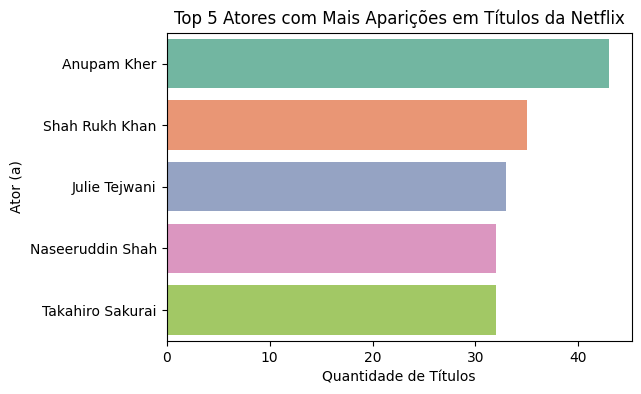

In [57]:
# Criando o gráfico para a coluna 'cast':

atores_separados = df['cast'][df['cast'] != "Unknown"].str.split(",").explode().str.lstrip()
cinco_atores = atores_separados.value_counts().head()

plt.figure(figsize = (6, 4))
sns.barplot(x = cinco_atores.values, y = cinco_atores.index, hue = cinco_atores.index, palette = "Set2")
plt.title("Top 5 Atores com Mais Aparições em Títulos da Netflix")
plt.xlabel("Quantidade de Títulos")
plt.ylabel("Ator (a)")
plt.show()

Com isso, concluímos que o indiano Anupam Kher é o ator com mais aparições em filmes/séries da Netflix.

### 3.2.4 Coluna 'country'

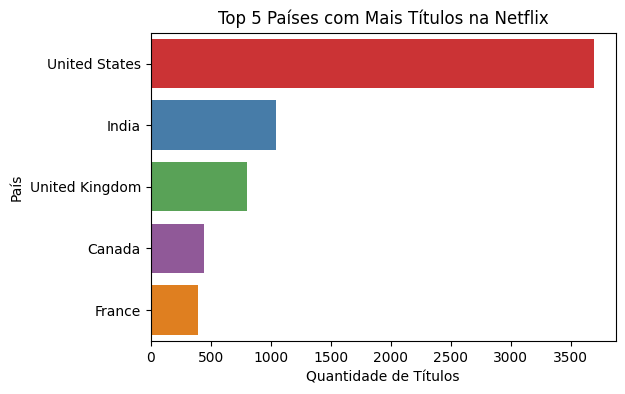

In [67]:
# Criando o gráfico para a coluna 'country':

países_separados = df['country'][df['country'] != "Unknown"].str.split(",").explode().str.lstrip()
cinco_países = países_separados.value_counts().head()

plt.figure(figsize = (6, 4))
sns.barplot(x = cinco_países.values, y = cinco_países.index, hue = cinco_países.index, palette = "Set1")
plt.title("Top 5 Países com Mais Títulos na Netflix")
plt.xlabel("Quantidade de Títulos")
plt.ylabel("País")
plt.show()

Concluímos, portanto, que os Estados Unidos da América é o país que disparadamente possui mais títulos na Netflix.

### 3.2.5 Coluna 'rating'

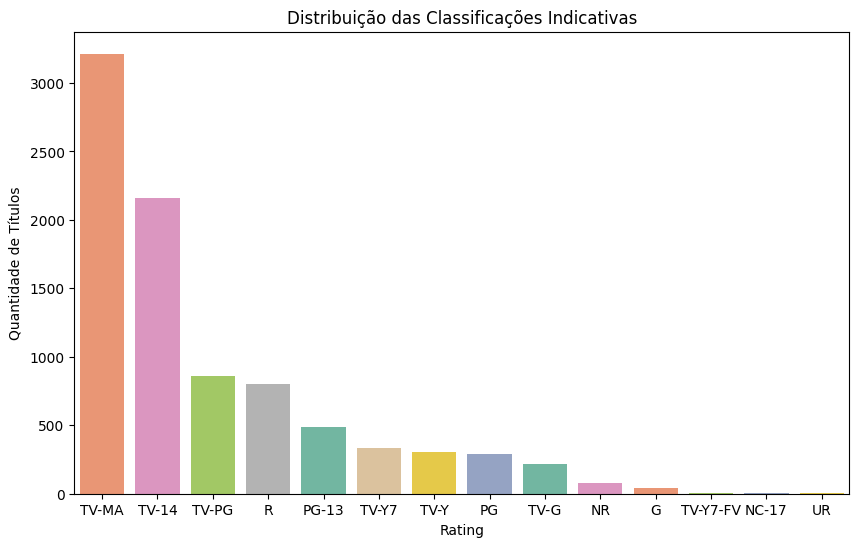

In [70]:
# Criando o gráfico da coluna 'rating':

plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'rating', order = df['rating'].value_counts().index, hue = 'rating', palette = "Set2")
plt.title("Distribuição das Classificações Indicativas")
plt.xlabel("Rating")
plt.ylabel("Quantidade de Títulos")
plt.show()

Com isso, concluímos que, realmente, a Netflix possui mais séries/filmes direcionadas para o público adulto.

### 3.2.6 Coluna 'release_year'

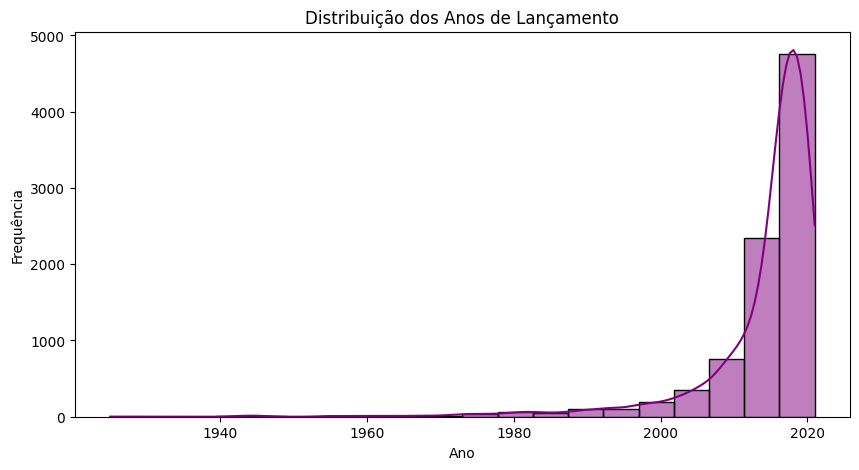

In [80]:
# Criando o gráfico da coluna 'release_year':

plt.figure(figsize = (10, 5))
sns.histplot(df['release_year'], kde = True, bins = 20, color = 'purple')
plt.title("Distribuição dos Anos de Lançamento")
plt.xlabel("Ano")
plt.ylabel("Frequência")
plt.show()

Com a utilização de um histograma, conseguimos perceber que títulos lançados na década de 2020 são os mais presentes no catálogo da Netflix.